## *01. Ingeniería de variables*

* La ingeniería de variables es el proceso de crear nuevas variables a partir de las variables existentes en un conjunto de datos para mejorar el rendimiento de un modelo de aprendizaje automático. También se conoce como selección de características o ingeniería de características.

* El objetivo de la ingeniería de variables es crear variables que sean más predictivas y relevantes para el modelo. Esto puede incluir la creación de variables de interacción, variables polinómicas, variables de agrupación y variables de transformación. La ingeniería de variables puede ser un proceso creativo y basado en la experiencia, así como un proceso basado en datos y matemáticas.

* La ingeniería de variables puede ser importante para mejorar la precisión del modelo de aprendizaje automático, reducir el tiempo de entrenamiento y mejorar la interpretación de los resultados del modelo. Puede ser especialmente importante en casos donde los datos disponibles son escasos o donde las características de los datos son complejas o no lineales.

* La ingeniería de variables también puede ayudar a abordar problemas de datos faltantes, valores atípicos y datos desbalanceados. Al identificar características relevantes y reducir la dimensionalidad de los datos, la ingeniería de variables puede mejorar la capacidad del modelo para generalizar a nuevos datos y mejorar su capacidad para encontrar patrones relevantes en los datos.

In [1]:
# Core
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import empiricaldist
import warnings
from scipy import stats

# Display
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
sns.set_theme(context='notebook', style=plt.style.use('dark_background'))
warnings.simplefilter('ignore')

In [2]:
# Lectura de los datos
data = pd.read_parquet('../datasets/train_preprocesado.parquet')
data.head()

,id,fraude,valor,hora_aux,dist_max_nal,canal1,fecha,cod_pais,canal,diasem,diames,fecha_vin,oficina_vin,sexo,segmento,edad,ingresos,egresos,nropaises,nrociudades,dist_mean_nal,dist_hoy,dist_sum_nal
0,9000000001,1,0.00,13,659.13,atm_int,1970-01-01,us,atm_int,5,1,1970-01-01,392.00,m,personal plus,29.00,"1,200,000.00","1,200,000.00",1,6,474.94,"4,552.41","5,224.36"
1,9000000002,1,0.00,17,594.77,atm_int,1970-01-01,us,atm_int,5,15,1970-01-01,716.00,m,personal plus,29.00,"5,643,700.00","500,000.00",1,5,289.99,"4,552.41","2,029.90"
2,9000000003,1,0.00,13,659.13,atm_int,1970-01-01,us,atm_int,5,1,1970-01-01,392.00,m,personal plus,29.00,"1,200,000.00","1,200,000.00",1,6,474.94,"4,552.41","5,224.36"
3,9000000004,1,0.00,13,659.13,atm_int,1970-01-01,us,atm_int,5,1,1970-01-01,392.00,m,personal plus,29.00,"1,200,000.00","1,200,000.00",1,6,474.94,"4,552.41","5,224.36"
4,9000000005,1,0.00,0,1.00,atm_int,1970-01-01,cr,atm_int,0,10,1970-01-01,788.00,m,personal,25.00,0.00,0.00,1,1,NaN,"1,482.35",1.00


In [3]:
# Transponemos los índices
data.index = data['id']

# Deshacemos de las variables que no aportan
data.drop(['id', 'fecha', 'fecha_vin'], inplace=True, axis=1)
data.head()

,fraude,valor,hora_aux,dist_max_nal,canal1,cod_pais,canal,diasem,diames,oficina_vin,sexo,segmento,edad,ingresos,egresos,nropaises,nrociudades,dist_mean_nal,dist_hoy,dist_sum_nal
id,,,,,,,,,,,,,,,,,,,,
9000000001,1,0.00,13,659.13,atm_int,us,atm_int,5,1,392.00,m,personal plus,29.00,"1,200,000.00","1,200,000.00",1,6,474.94,"4,552.41","5,224.36"
9000000002,1,0.00,17,594.77,atm_int,us,atm_int,5,15,716.00,m,personal plus,29.00,"5,643,700.00","500,000.00",1,5,289.99,"4,552.41","2,029.90"
9000000003,1,0.00,13,659.13,atm_int,us,atm_int,5,1,392.00,m,personal plus,29.00,"1,200,000.00","1,200,000.00",1,6,474.94,"4,552.41","5,224.36"
9000000004,1,0.00,13,659.13,atm_int,us,atm_int,5,1,392.00,m,personal plus,29.00,"1,200,000.00","1,200,000.00",1,6,474.94,"4,552.41","5,224.36"
9000000005,1,0.00,0,1.00,atm_int,cr,atm_int,0,10,788.00,m,personal,25.00,0.00,0.00,1,1,NaN,"1,482.35",1.00


### *Separar*
* En machine learning, la separación de datos se refiere a dividir un conjunto de datos en subconjuntos más pequeños que se utilizan para entrenar y evaluar un modelo de aprendizaje automático.

* La separación de datos es importante para evitar el sobreajuste del modelo. Si se utiliza todo el conjunto de datos para entrenar y ajustar el modelo, es posible que el modelo aprenda a memorizar los datos de entrenamiento y no pueda generalizar bien a nuevos datos. Al separar los datos, se puede evaluar el rendimiento del modelo en datos que no se han visto antes y garantizar que el modelo pueda generalizar bien.

In [4]:
from sklearn.model_selection import train_test_split

# Separamos los features y el target
X = data.loc[:, data.columns != 'fraude']
y = data.loc[:, data.columns == 'fraude'].squeeze()

# Splitting
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=25)
print(f'80% Train set: {X_train.shape, y_train.shape}')
print(f'20% Validation set: {X_val.shape, y_val.shape}')

80% Train set: ((2368, 19), (2368,))
20% Validation set: ((592, 19), (592,))


### *Capturar*

In [5]:
# Función para capturar los tipos de variables
def capture_variables(data:pd.DataFrame) -> tuple:
    
    """
    Function to capture the types of Dataframe variables

    Args:
        dataframe: DataFrame
    
    Return:
        variables: tuple
    
    The order to unpack variables:
    1. continuous
    2. categoricals
    3. discretes
    4. temporaries
    """

    numericals = list(data.select_dtypes(include = [np.int64, np.int32, np.float64, np.float32]).columns)
    categoricals = list(data.select_dtypes(include = ['category', 'object', 'bool']).columns)
    temporaries = list(data.select_dtypes(include = ['datetime', 'timedelta']).columns)
    discretes = [col for col in data[numericals] if len(data[numericals][col].unique()) <= 10]
    continuous = [col for col in data[numericals] if col not in discretes]

    # Variables
    print('\t\tTipos de variables')
    print(f'Hay {len(continuous)} variables continuas')
    print(f'Hay {len(discretes)} variables discretas')
    print(f'Hay {len(temporaries)} variables temporales')
    print(f'Hay {len(categoricals)} variables categóricas')

    variables = tuple((continuous, categoricals, discretes, temporaries))
    
    # Retornamos una tupla de listas
    return variables


# Captura de variables
continuous, categoricals, discretes, temporaries = capture_variables(data=X)

		Tipos de variables
Hay 12 variables continuas
Hay 2 variables discretas
Hay 0 variables temporales
Hay 5 variables categóricas


In [6]:
# Función para observar variables con datos nulos y su porcentaje
def nan_values(data:pd.DataFrame, variables:list, variable_type:str) -> any:
    
    """
    Function to observe variables with nan values and their percentages

    Args:
        data: DataFrame
        variables: list
        variable_type: str
    
    Return:
        print: Variables that meet this condition
    """
    
    print(f'=== Variables {variable_type} ===')
    
    for var in variables:    
        if data[var].isnull().sum() > 0:
            print(f'{var}: {data[var].isnull().mean()*100:0.2f}%')
            

# Valores faltantes
nan_values(X, continuous, variable_type='continuas')
print()
nan_values(X, discretes, variable_type='discretas')
print()
nan_values(X, temporaries, variable_type='temporales')
print()
nan_values(X, categoricals, variable_type='categóricas')

=== Variables continuas ===
oficina_vin: 0.81%
edad: 0.81%
ingresos: 0.81%
egresos: 0.81%
dist_mean_nal: 15.44%

=== Variables discretas ===

=== Variables temporales ===

=== Variables categóricas ===
sexo: 1.86%
segmento: 0.81%


In [7]:
# Transformamos las discretas como categóricas
X[discretes], X_train[discretes], X_val[discretes] = [subset.loc[:, discretes].astype('category') for subset in [X, X_train, X_val]]
X[discretes].dtypes

diasem       category
nropaises    category
dtype: object

### *Valores faltantes*

In [8]:
# Variables Continuas
# Capturemos las variables con alto porcentaje de datos faltantes (más del 5%)
continuous_more_than_5perc = [var for var in continuous if X[var].isnull().mean() > 0.05]
print(f'Variables continuas por encima del 5% de datos faltantes:\n{continuous_more_than_5perc}\n')

# Capturemos las variables con menor porcentaje de datos faltantes (menos del 5%)
continuous_less_than_5perc = [var for var in continuous if X[var].isnull().sum() > 0 and X[var].isnull().mean() <= 0.05]
print(f'Variables continuas por debajo del 5% de datos faltantes:\n{continuous_less_than_5perc}\n')

# Variables Categóricas
# Capturemos las variables con alto porcentaje de datos faltantes (más del 5%)
categoricals_more_than_5perc = [var for var in categoricals if X[var].isnull().mean() > 0.05]
print(f'Variables categóricas por encima del 5% de datos faltantes:\n{categoricals_more_than_5perc}\n')

# Capturemos las variables con menor porcentaje de datos faltantes (menos del 5%)
categoricals_less_than_5perc = [var for var in categoricals if X[var].isnull().sum() > 0 and X[var].isnull().mean() <= 0.05]
print(f'Variables categóricas por debajo del 5% de datos faltantes:\n{categoricals_less_than_5perc}\n')

# Variables Discretas
# Capturemos las variables con alto porcentaje de datos faltantes (más del 5%)
discretes_more_than_5perc = [var for var in discretes if X[var].isnull().mean() > 0.05]
print(f'Variables discretas por encima del 5% de datos faltantes:\n{discretes_more_than_5perc}\n')

# Capturemos las variables con menor porcentaje de datos faltantes (menos del 5%)
discretes_less_than_5perc = [var for var in discretes if X[var].isnull().sum() > 0 and X[var].isnull().mean() <= 0.05]
print(f'Variables discretas por debajo del 5% de datos faltantes:\n{discretes_less_than_5perc}')

Variables continuas por encima del 5% de datos faltantes:
['dist_mean_nal']

Variables continuas por debajo del 5% de datos faltantes:
['oficina_vin', 'edad', 'ingresos', 'egresos']

Variables categóricas por encima del 5% de datos faltantes:
[]

Variables categóricas por debajo del 5% de datos faltantes:
['sexo', 'segmento']

Variables discretas por encima del 5% de datos faltantes:
[]

Variables discretas por debajo del 5% de datos faltantes:
[]


### *Imputar*

* La imputación se refiere al proceso de reemplazar los valores faltantes o nulos en un conjunto de datos por valores estimados. En machine learning, la imputación es un paso importante en el preprocesamiento de datos para garantizar que los modelos de aprendizaje automático se puedan entrenar con datos completos.

* La imputación puede realizarse de varias maneras, dependiendo de la naturaleza de los datos, de la cantidad y patrón de valores faltantes. Algunas técnicas comunes de imputación incluyen la imputación media o mediana, que reemplaza los valores faltantes con la media o la mediana de los valores existentes; la imputación de valores extremos, que reemplaza los valores faltantes con valores que se consideran extremos en el conjunto de datos.

* Es importante tener en cuenta que la imputación puede tener un impacto en la precisión del modelo de aprendizaje automático si no se realiza correctamente. Por lo tanto, es importante considerar cuidadosamente el método de imputación que se utiliza y evaluar el impacto de la imputación en el rendimiento del modelo.

In [9]:
print('\t\t\t=== IMPUTACIÓN ===\n')
print(f"""• Las variables continuas que están por debajo del 5% de datos faltantes: {continuous_less_than_5perc}, se les hará una imputación por una `muestra aleatoria`.

Mientras que las continuas por encima del 5%: {continuous_more_than_5perc}, se le hará una imputación a la `media` con un indicador de ausencia.\n""")

print(f"""• Las variables categóricas con datos faltantes por debajo del 5%: {categoricals_less_than_5perc} se imputará por una `muestra aleatoria`.""")

			=== IMPUTACIÓN ===

• Las variables continuas que están por debajo del 5% de datos faltantes: ['oficina_vin', 'edad', 'ingresos', 'egresos'], se les hará una imputación por una `muestra aleatoria`.

Mientras que las continuas por encima del 5%: ['dist_mean_nal'], se le hará una imputación a la `media` con un indicador de ausencia.

• Las variables categóricas con datos faltantes por debajo del 5%: ['sexo', 'segmento'] se imputará por una `muestra aleatoria`.


In [10]:
for var in continuous_less_than_5perc:
    X_train[f'{var}_imputed'] = X_train[var].copy()
    X_val[f'{var}_imputed'] = X_val[var].copy()
    
    # Muestra aleatoria
    random_sample_train = X_train[var].dropna().sample(X_train[var].isnull().sum(), random_state=0)
    random_sample_val = X_train[var].dropna().sample(X_val[var].isnull().sum(), random_state=0)
    
    # Pandas necesita tener el mismo índice para poder unir los datos
    random_sample_train.index = X_train[X_train[var].isnull()].index
    random_sample_val.index = X_val[X_val[var].isnull()].index

    # Reemplazar los datos nulos en la variable nueva
    X_train.loc[X_train[var].isnull(), f'{var}_imputed'] = random_sample_train
    X_val.loc[X_val[var].isnull(), f'{var}_imputed'] = random_sample_val

In [11]:
# Revisemos que los valores nulos fueron sustituidos
imputados = X_train.columns[-4:].tolist()
X_train[imputados].isnull().sum()

oficina_vin_imputed    0
edad_imputed           0
ingresos_imputed       0
egresos_imputed        0
dtype: int64

### *Varianza*
* En estadística, la varianza es una medida de dispersión que indica cuánto se alejan los valores de un conjunto de datos de su media o promedio. Es una medida de la variabilidad o dispersión de los datos alrededor de la media.

* La varianza puede ser útil para entender la distribución de los datos y su dispersión en relación con la media. Por ejemplo, si la varianza es alta, esto indica que los valores en el conjunto de datos están muy dispersos en relación con la media, mientras que una varianza baja indica que los valores están más agrupados alrededor de la media.

In [12]:
# Hay cambios en la varianza de la variable. Sin embargo, este cambio es mucho más pequeño 
# comparado con la sustitución por la media / mediana 

for var in continuous_less_than_5perc:
    print(f"Varianza de la variable {var}: {X_train[var].var():0.2f}")
    print(f"Varianza después de la sustitición aleatoria: {X_train[f'{var}_imputed'].var():0.2f}\n")

Varianza de la variable oficina_vin: 84681.39
Varianza después de la sustitición aleatoria: 84736.26

Varianza de la variable edad: 162.01
Varianza después de la sustitición aleatoria: 161.79

Varianza de la variable ingresos: 3441939932236050.00
Varianza después de la sustitición aleatoria: 3412442706240536.00

Varianza de la variable egresos: 4365488762515124.50
Varianza después de la sustitición aleatoria: 4327181779650580.00



In [13]:
# Realizar los cambios en los Dataframes originales
drop = X_train[continuous_less_than_5perc].columns.to_list()
names = dict(zip(X_train[imputados].columns.to_list(), drop))

for subset in [X_train, X_val]:
    subset.drop(drop, axis=1, inplace=True)
    subset.rename(columns=names, inplace=True)
    
# Validamos los cambios
X_train[drop].isnull().sum()

oficina_vin    0
edad           0
ingresos       0
egresos        0
dtype: int64

In [14]:
# Añadir el indicador de ausencia esto se puede hacer de forma sencilla usando np.where de numpy y isnull de pandas:
X_train[f'{continuous_more_than_5perc[0]}_NA'] = np.where(X_train[continuous_more_than_5perc[0]].isnull(), 1, 0)
X_val[f'{continuous_more_than_5perc[0]}_NA'] = np.where(X_val[continuous_more_than_5perc[0]].isnull(), 1, 0)

In [15]:
# Validamos
X_train[['dist_mean_nal', 'dist_mean_nal_NA']].sample(10, random_state=23)

,dist_mean_nal,dist_mean_nal_NA
id,,
9000000320,NaN,1
1522491450,501.50,0
5943867399,11.89,0
3743071124,NaN,1
6151907882,80.92,0
8570114246,58.59,0
6442897602,243.62,0
839673896,252.89,0
6619272977,128.84,0


In [16]:
# Obtenemos la media
mean = X_train[continuous_more_than_5perc[0]].mean()
mean

196.44530612244898

In [17]:
# Función para imputar por la media
def impute_na(data, variable, mean):
    return data[variable].fillna(mean)

# Ahora reemplazar con la media
X_train['dist_mean_nal_mean'] = impute_na(X_train, 'dist_mean_nal', mean)
X_val['dist_mean_nal_mean'] = impute_na(X_val, 'dist_mean_nal', mean)

In [18]:
# Revisemos que los valores nulos fueron sustituidos
imputados = X_train.columns[-1:].tolist()
X_train[imputados].isnull().sum()

dist_mean_nal_mean    0
dtype: int64

In [19]:
# Veamos como la varianza cambia luego de la sustitución por la media esto es de esperarse, porque el porcentaje de valores ausentes 
# es relativamente grande en esta variable ≈15%

for var in continuous_more_than_5perc:    
    print(f"Varianza de la variable {var}: {X_train[var].var():0.2f}")
    print(f"Varianza después de la sustitición por la media: {X_train[f'{var}_mean'].var():0.2f}\n")

Varianza de la variable dist_mean_nal: 37060.93
Varianza después de la sustitición por la media: 31439.94



In [20]:
# Realizar los cambios en los Dataframes originales
drop = X_train[continuous_more_than_5perc].columns.to_list()
names = dict(zip(X_train[imputados].columns.to_list(), drop))

for subset in [X_train, X_val]:
    subset.drop(drop, axis=1, inplace=True)
    subset.rename(columns=names, inplace=True)
    
# Validamos los cambios
X_train[drop].isnull().sum()

dist_mean_nal    0
dtype: int64

In [21]:
# Validamos los cambios realizados
X_train[['dist_mean_nal', 'dist_mean_nal_NA']].sample(10, random_state=23)

,dist_mean_nal,dist_mean_nal_NA
id,,
9000000320,196.45,1
1522491450,501.50,0
5943867399,11.89,0
3743071124,196.45,1
6151907882,80.92,0
8570114246,58.59,0
6442897602,243.62,0
839673896,252.89,0
6619272977,128.84,0


In [22]:
for var in categoricals_less_than_5perc:
    X_train[f'{var}_imputed'] = X_train[var].copy()
    X_val[f'{var}_imputed'] = X_val[var].copy()
    
    # Muestra aleatoria
    random_sample_train = X_train[var].dropna().sample(X_train[var].isnull().sum(), random_state=0)
    random_sample_val = X_train[var].dropna().sample(X_val[var].isnull().sum(), random_state=0)
    
    # Pandas necesita tener el mismo índice para poder unir los datos
    random_sample_train.index = X_train[X_train[var].isnull()].index
    random_sample_val.index = X_val[X_val[var].isnull()].index

    # Reemplazar los datos nulos en la variable nueva
    X_train.loc[X_train[var].isnull(), f'{var}_imputed'] = random_sample_train
    X_val.loc[X_val[var].isnull(), f'{var}_imputed'] = random_sample_val

In [23]:
# Revisemos que los valores nulos fueron sustituidos
imputados = X_train.columns[-2:].tolist()
X_train[imputados].isnull().sum()

sexo_imputed        0
segmento_imputed    0
dtype: int64

###  *Distribución de los datos*

* En machine learning, la **distribución de los datos** de entrenamiento es importante porque afecta la capacidad del modelo de aprendizaje automático para generalizar a nuevos datos. Si los datos de entrenamiento siguen una distribución diferente a la de los datos de prueba, el modelo puede sobreajustar los datos de entrenamiento y no ser capaz de generalizar bien a nuevos datos.

* Por lo tanto, es importante evaluar la **distribución de los datos** de entrenamiento y prueba antes de entrenar un modelo de aprendizaje automático. Esto se puede hacer utilizando técnicas de visualización de datos y pruebas estadísticas para identificar cualquier desviación de la distribución esperada. Además, es importante considerar técnicas de preprocesamiento de datos, como la normalización o la transformación de los datos, para garantizar que la **distribución de los datos** sea adecuada para el modelo de aprendizaje automático que se está utilizando.

In [24]:
# Ahora evaluemos el efecto de la sustitución en la distribución de las categorías y el target
def categorical_distribution(df, variable_original, variable_imputed):

    tmp = pd.concat(
        [
            # Porcentaje de observaciones por categoría, variable original
            df[variable_original].value_counts() / len(df[variable_original].dropna()),

            # Porcentaje de observaciones por categoría, variable imputada
            df[variable_imputed].value_counts() / len(df)
        ],
        axis=1)

    # Nombre de las columnas
    tmp.columns = ['original', 'imputed']

    return tmp

In [25]:
# Correr la función en una variable categórica
categorical_distribution(X_train, categoricals_less_than_5perc[0], f'{categoricals_less_than_5perc[0]}_imputed')

,original,imputed
m,0.51,0.51
f,0.49,0.49


In [26]:
# Correr la función en una variable categórica
categorical_distribution(X_train, categoricals_less_than_5perc[1], f'{categoricals_less_than_5perc[1]}_imputed')

,original,imputed
personal plus,0.52,0.52
preferencial,0.32,0.32
personal,0.06,0.06
emprendedor,0.05,0.05
pyme,0.04,0.04
empresarial,0.00,0.00


In [27]:
# Realizar los cambios en los Dataframes originales
drop = X_train[categoricals_less_than_5perc].columns.to_list()
names = dict(zip(X_train[imputados].columns.to_list(), drop))

for subset in [X_train, X_val]:
    subset.drop(drop, axis=1, inplace=True)
    subset.rename(columns=names, inplace=True)
    
# Validamos los cambios
X_train[drop].isnull().sum()

sexo        0
segmento    0
dtype: int64

In [28]:
# Cambios en su totalidad
X_train.isnull().sum()

valor               0
hora_aux            0
dist_max_nal        0
canal1              0
cod_pais            0
canal               0
diasem              0
diames              0
nropaises           0
nrociudades         0
dist_hoy            0
dist_sum_nal        0
oficina_vin         0
edad                0
ingresos            0
egresos             0
dist_mean_nal_NA    0
dist_mean_nal       0
sexo                0
segmento            0
dtype: int64

### *Etiquetas raras*

* En el contexto de machine learning, las etiquetas raras en las variables categóricas se refieren a categorías o etiquetas que tienen muy pocos ejemplos en un conjunto de datos en comparación con las categorías más comunes.

* Para abordar este problema, se pueden utilizar técnicas de preprocesamiento de datos, como la agrupación de categorías o la eliminación de las etiquetas raras para reducir la complejidad de la variable categórica. Además, se pueden utilizar técnicas de codificación de variables categóricas que son resistentes a las etiquetas raras, como la codificación de una etiqueta rara como "otro" o la codificación de las categorías con frecuencias más bajas como "raras".

* Es importante tener en cuenta que el tratamiento de etiquetas raras en las variables categóricas puede tener un impacto significativo en la precisión del modelo de aprendizaje automático. Por lo tanto, es importante evaluar cuidadosamente el impacto de las etiquetas raras y considerar las opciones de tratamiento adecuadas para cada conjunto de datos específico.

In [29]:
# Variables categóricas con alta cardinalidad y baja cardinalidad
# Por medio del EDA definimos 2 etiquetas en la alta cardinalidad y 4 en la baja cardinalidad de las variables categóricas
categoricals_high_cardinality = ['cod_pais']
categoricals_low_cardinality = [var for var in categoricals if var not in categoricals_high_cardinality]
print(f'Variables categórcias con alta cardinalidad: {categoricals_high_cardinality}')
print(f'Variables categórcias con baja cardinalidad: {categoricals_low_cardinality}')

Variables categórcias con alta cardinalidad: ['cod_pais']
Variables categórcias con baja cardinalidad: ['canal1', 'canal', 'sexo', 'segmento']


In [30]:
# Variables discretas con alta cardinalidad y baja cardinalidad
# Por medio del EDA definimos 7 etiquetas en la alta cardinalidad y 5 en la baja cardinalidad de las variables discretas
discretes_high_cardinality = ['nropaises']
discretes_low_cardinality = [var for var in discretes if var not in discretes_high_cardinality]

print(f'Variables discretas con alta cardinalidad: {discretes_high_cardinality}')
print(f'Variables discretas con baja cardinalidad: {discretes_low_cardinality}')

Variables discretas con alta cardinalidad: ['nropaises']
Variables discretas con baja cardinalidad: ['diasem']


In [31]:
# Función para encontrar las etiquetas comunes
def categorias_comunes(df, variable, tolerance):
    
    temp = df.groupby([variable])[variable].count() / len(df)
    non_rare = [x for x in temp.loc[temp > tolerance].index.values]
    return non_rare

In [32]:
# Función para encontrar las etiquetas poco comunes
def codificacion_categorias_raras(X_train, X_val, variable, tolerance):

    X_train = X_train.copy()
    X_val = X_val.copy()

    # Encontrar la categoría más frecuente
    frequent_cat = categorias_comunes(X_train, variable, tolerance)

    # Reagrupar las categorías raras
    X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
    X_val[variable] = np.where(X_val[variable].isin(frequent_cat), X_val[variable], 'Rare')

    return X_train, X_val

In [33]:
# Función para graficar las etiquetas poco comunes
def graficar_etiquetas_raras(variable):
    
    for col in variable:
        temp_df = pd.Series(X_train[col].value_counts() / len(X_train) )

        # Graficar con los porcentajes
        fig = temp_df.sort_values(ascending=False).plot.bar()
        fig.set_xlabel(col)

        # Añadir línea a 5% para resaltar categorias poco comunes
        fig.axhline(y=0.05, color='red')
        fig.set_ylabel('Porcentaje de casas')
        plt.grid()
        plt.tight_layout()

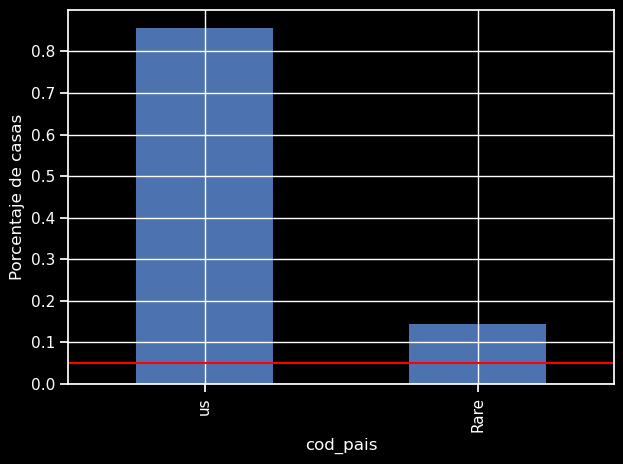

In [34]:
# Graficar
for variable in categoricals_high_cardinality:
    X_train, X_val = codificacion_categorias_raras(X_train, X_val, variable, 0.05)
    
graficar_etiquetas_raras(categoricals_high_cardinality)

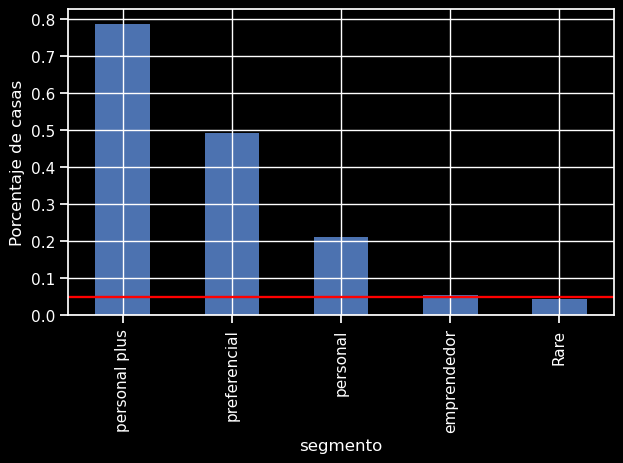

In [35]:
# Graficar
for variable in categoricals_low_cardinality:
    X_train, X_val = codificacion_categorias_raras(X_train, X_val, variable, 0.05)
    
graficar_etiquetas_raras(categoricals_low_cardinality)

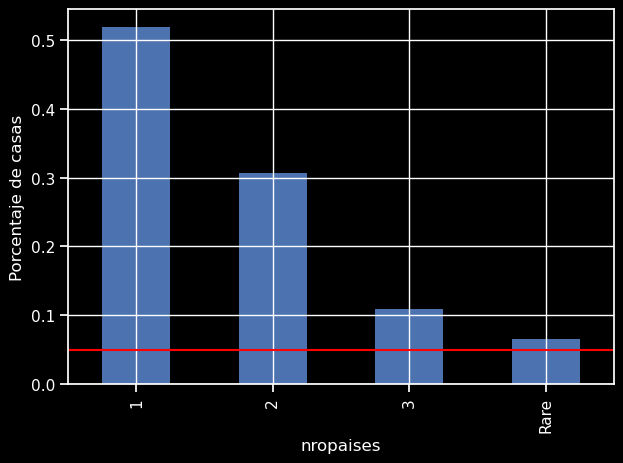

In [36]:
# Graficar
for variable in discretes_high_cardinality:
    X_train, X_val = codificacion_categorias_raras(X_train, X_val, variable, 0.05)
    
graficar_etiquetas_raras(discretes_high_cardinality)

### *Discretizar*

* Discretizar en machine learning se refiere al proceso de convertir una variable continua en una variable discreta al dividir el rango de valores de la variable en intervalos o "bins" y asignar una etiqueta o valor discreto a cada intervalo.

* La discretización puede ser útil en situaciones donde los modelos de aprendizaje automático requieren variables discretas o categorías en lugar de variables continuas. Por ejemplo, los árboles de decisión pueden beneficiarse de la discretización al permitir la creación de nodos que representan diferentes intervalos de la variable.

In [37]:
# Con feature-engine podemos automatizar el proceso de discretización para muchas variables en una línea de código
from feature_engine.discretisation import EqualFrequencyDiscretiser

disc = EqualFrequencyDiscretiser(q=10, variables=continuous, return_object=True)
disc.fit(X_train)

# Transformar sets de entrenamiento y validación
X_train = disc.transform(X_train)
X_val = disc.transform(X_val)

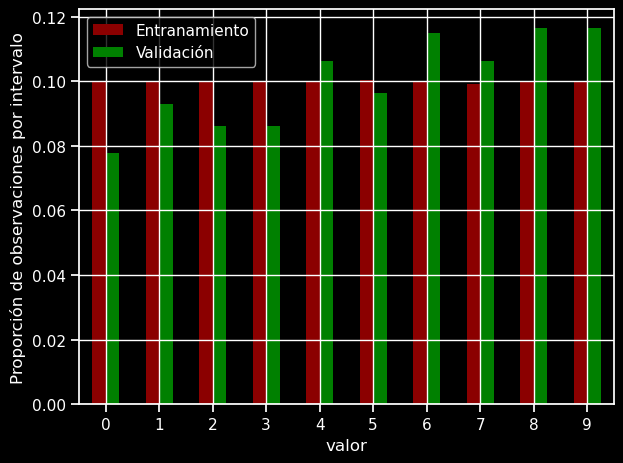

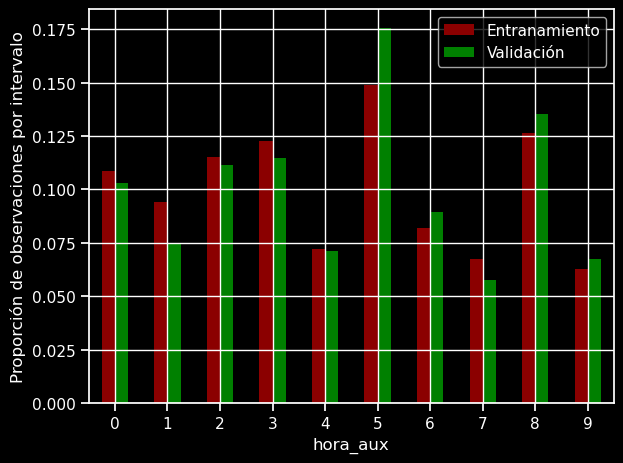

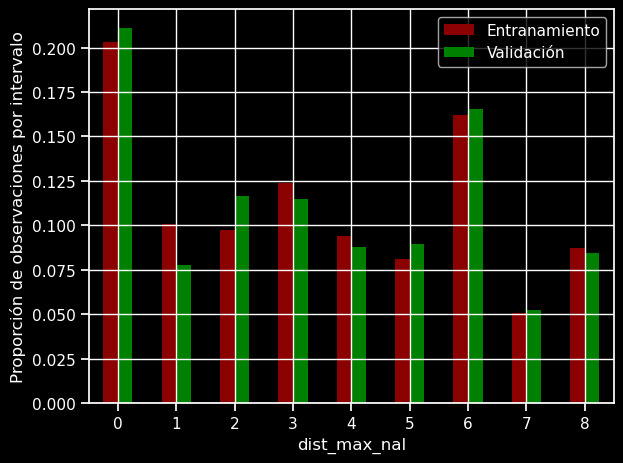

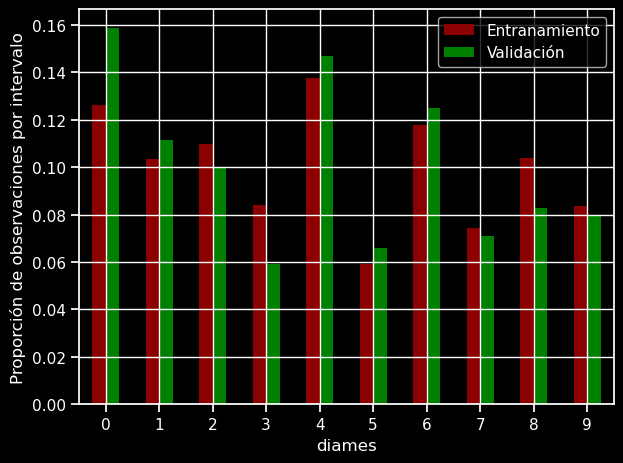

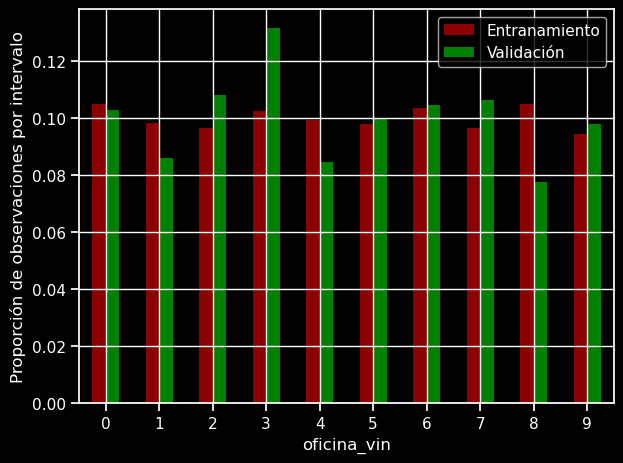

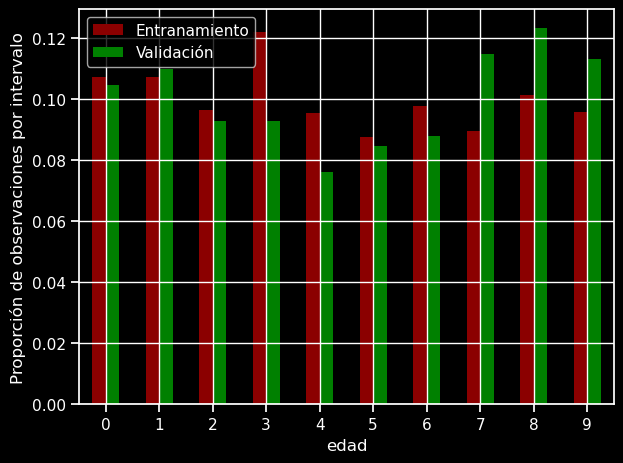

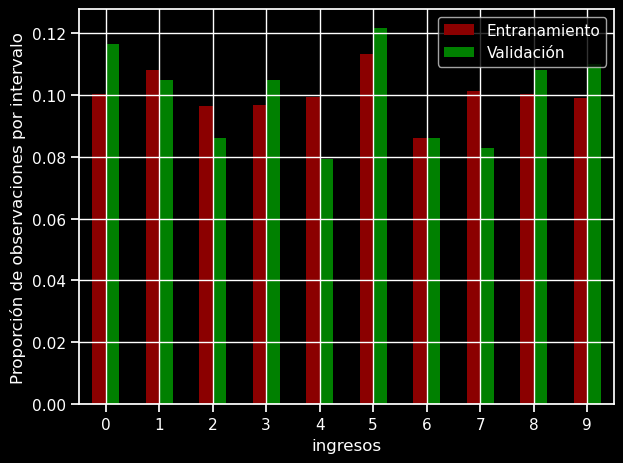

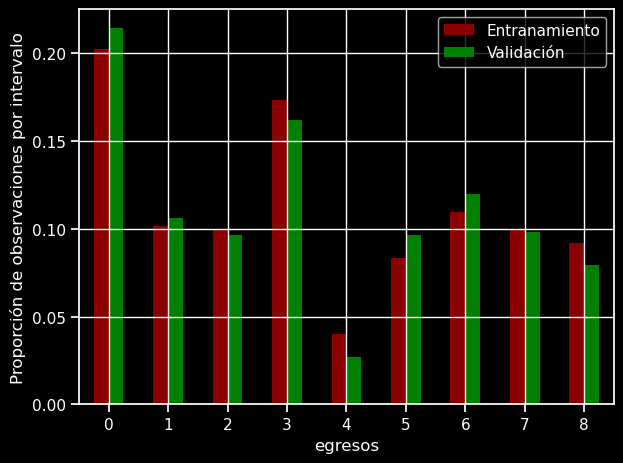

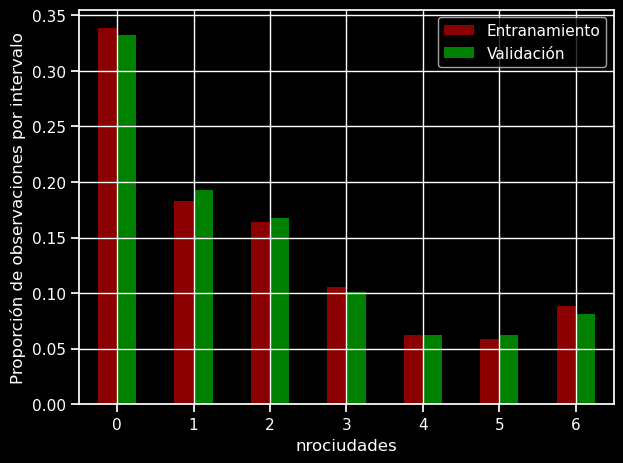

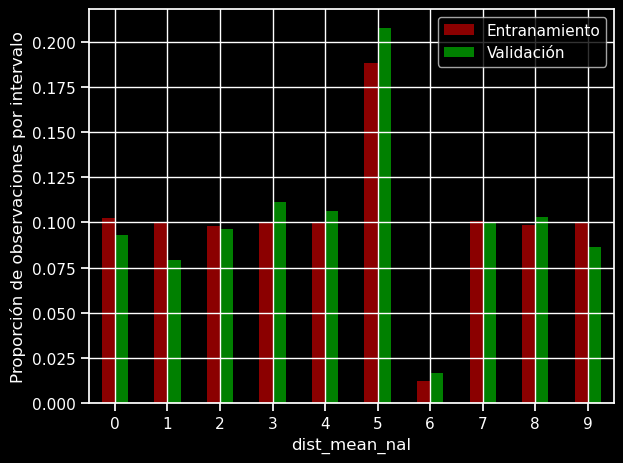

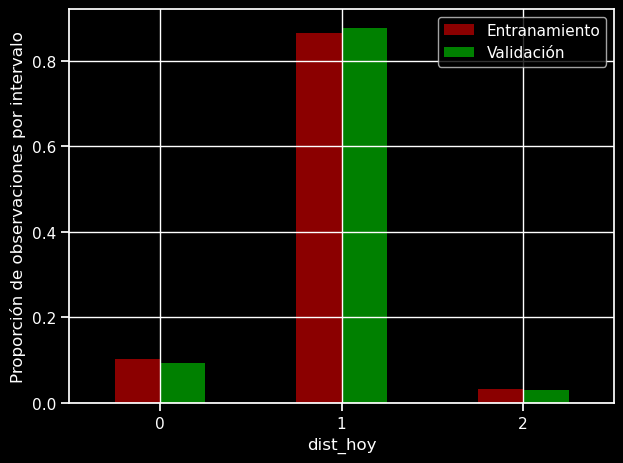

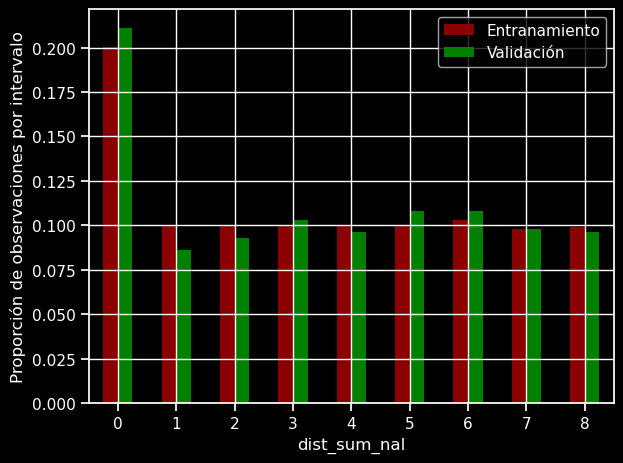

In [38]:
# Ahora exploramos el número de observaciones por intervalos
for var in continuous:
    t1 = X_train.groupby([var])[var].count() / len(X_train)
    t2 = X_val.groupby([var])[var].count() / len(X_val)
    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['Entranamiento', 'Validación']
    tmp.plot.bar(color=['darkred', 'green'], lw=2)
    plt.xticks(rotation=0)
    plt.ylabel('Proporción de observaciones por intervalo')
    plt.grid()
    plt.tight_layout()

### *Codificar*

* En machine learning, codificar se refiere al proceso de transformar variables categóricas en una forma que los modelos de aprendizaje automático puedan procesar. Los modelos de aprendizaje automático generalmente solo pueden procesar variables numéricas, por lo que se debe codificar cualquier variable categórica en una forma numérica antes de utilizarla en el modelo.

* Existen varias técnicas de codificación que se pueden utilizar, dependiendo de la naturaleza de las variables categóricas. Algunas técnicas comunes incluyen:
    * Codificación one-hot (One-hot encoding)
    * Codificación por enteros
    * Codificación por frecuencia
    * Codificación por enteros ordenados
    * Codificación por pesos de evidencia

In [39]:
# Con feature-engine podemos automatizar el proceso de codificación para muchas variables en una línea de código
from feature_engine.encoding import OrdinalEncoder

# NOTA necesitamos fijar el parámetro encoding_method con el valor 'ordered', de lo contrario los números
# serán asignados arbitrariamente
encoder = OrdinalEncoder(encoding_method='ordered',
                         variables=continuous+categoricals+discretes)
encoder.fit(X_train, y_train)

X_train = encoder.transform(X_train)
X_val = encoder.transform(X_val)

# Valores existentes en cada variable
encoder.encoder_dict_

{'valor': {2: 0, 1: 1, 4: 2, 6: 3, 3: 4, 0: 5, 8: 6, 5: 7, 9: 8, 7: 9},
 'hora_aux': {4: 0, 3: 1, 2: 2, 9: 3, 5: 4, 1: 5, 7: 6, 8: 7, 6: 8, 0: 9},
 'dist_max_nal': {1: 0, 4: 1, 5: 2, 7: 3, 2: 4, 3: 5, 6: 6, 0: 7, 8: 8},
 'diames': {1: 0, 6: 1, 4: 2, 8: 3, 0: 4, 5: 5, 7: 6, 3: 7, 2: 8, 9: 9},
 'oficina_vin': {9: 0, 4: 1, 8: 2, 3: 3, 0: 4, 5: 5, 2: 6, 6: 7, 7: 8, 1: 9},
 'edad': {8: 0, 6: 1, 5: 2, 7: 3, 3: 4, 9: 5, 4: 6, 0: 7, 2: 8, 1: 9},
 'ingresos': {9: 0, 8: 1, 7: 2, 6: 3, 5: 4, 2: 5, 3: 6, 4: 7, 1: 8, 0: 9},
 'egresos': {8: 0, 7: 1, 5: 2, 3: 3, 6: 4, 4: 5, 0: 6, 2: 7, 1: 8},
 'nrociudades': {5: 0, 6: 1, 2: 2, 1: 3, 4: 4, 3: 5, 0: 6},
 'dist_mean_nal': {0: 0, 2: 1, 3: 2, 1: 3, 6: 4, 4: 5, 7: 6, 8: 7, 5: 8, 9: 9},
 'dist_hoy': {1: 0, 0: 1, 2: 2},
 'dist_sum_nal': {1: 0, 6: 1, 3: 2, 8: 3, 5: 4, 2: 5, 7: 6, 0: 7, 4: 8},
 'canal1': {'pos': 0, 'atm_int': 1},
 'cod_pais': {'us': 0, 'Rare': 1},
 'canal': {'mci': 0, 'pos': 1, 'atm_int': 2},
 'sexo': {'m': 0, 'f': 1},
 'segmento': {'Rare': 0,

In [40]:
# Visualizar los cambios realizados
X_train

,valor,hora_aux,dist_max_nal,canal1,cod_pais,canal,diasem,diames,nropaises,nrociudades,dist_hoy,dist_sum_nal,oficina_vin,edad,ingresos,egresos,dist_mean_nal_NA,dist_mean_nal,sexo,segmento
id,,,,,,,,,,,,,,,,,,,,
241673693,1,9,6,0,0,0,0,0,3,3,0,1,6,5,2,1,0,7,1,1
843868634,9,4,6,1,1,2,4,4,3,0,1,3,3,4,3,2,0,2,1,2
5951751482,8,7,2,1,1,2,5,5,3,2,1,8,3,0,4,1,0,6,1,2
8879690992,5,9,5,0,0,0,5,9,0,4,0,1,1,2,1,6,0,2,0,1
2864541356,3,9,3,0,0,0,1,1,3,1,0,6,5,0,3,4,0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732906462,0,2,6,1,0,2,4,4,3,6,0,8,9,8,8,8,0,9,1,2
4180048274,3,8,7,1,0,2,4,7,3,6,0,7,8,4,8,2,1,8,0,2
4270561811,9,0,0,0,0,1,1,2,2,6,0,5,4,3,0,0,0,3,0,1


### *Relación monóntona (Monotonicidad)*

* Una relación monótona es una relación matemática entre dos variables en la que el aumento en el valor de una variable siempre se asocia con un aumento o disminución en el valor de la otra variable. En otras palabras, una relación monótona indica que hay una tendencia en la relación entre las dos variables, lo que significa que una variable puede predecirse mejor si se conoce el valor de la otra variable.

* La importancia de la relación monótona en el aprendizaje automático radica en el hecho de que muchos algoritmos de aprendizaje automático, como las redes neuronales y los árboles de decisión, asumen una relación monótona entre las características de entrada y la variable de salida. Cuando la relación monótona se mantiene, es más fácil para estos algoritmos aprender a predecir la variable de salida y proporcionar resultados precisos.

* Por lo tanto, la identificación de relaciones monótonas es importante en la exploración y análisis de datos, ya que puede ayudar a seleccionar las características relevantes para el modelo y mejorar la precisión de las predicciones. También puede ser útil en la selección de algoritmos de aprendizaje automático adecuados para un conjunto de datos específico.

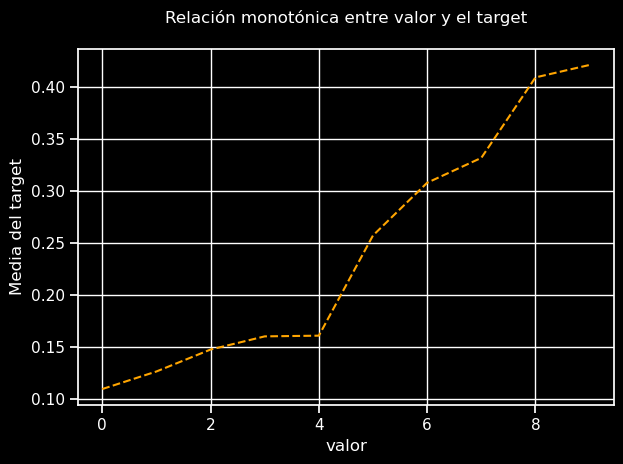

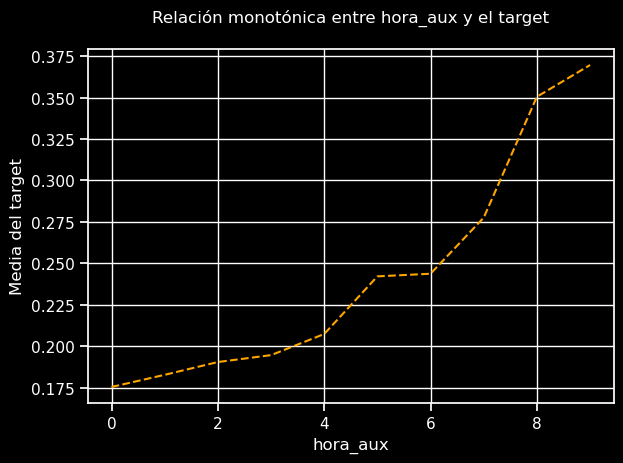

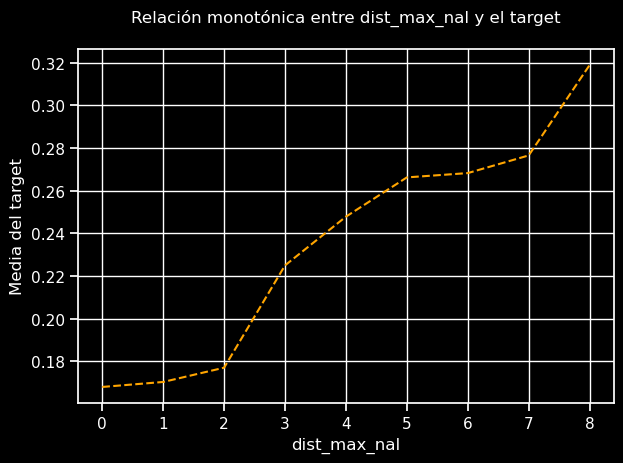

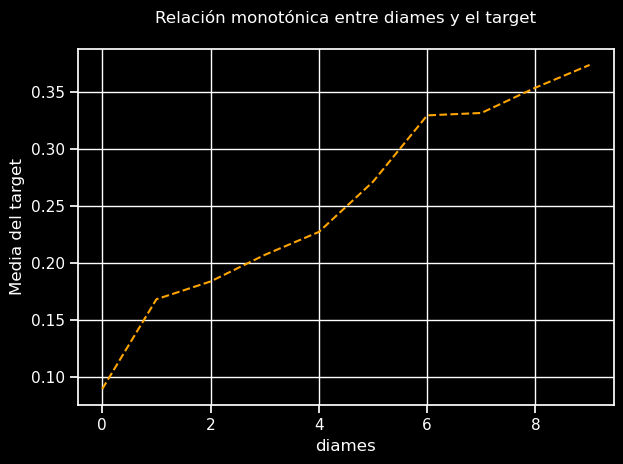

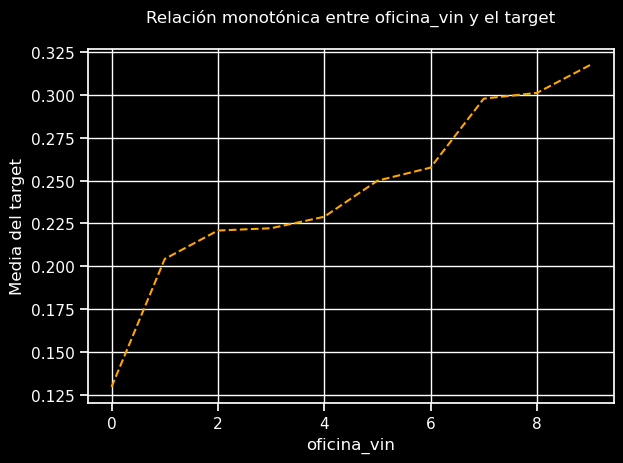

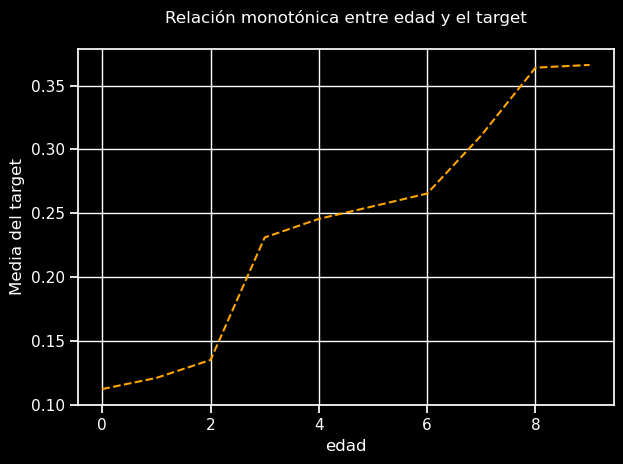

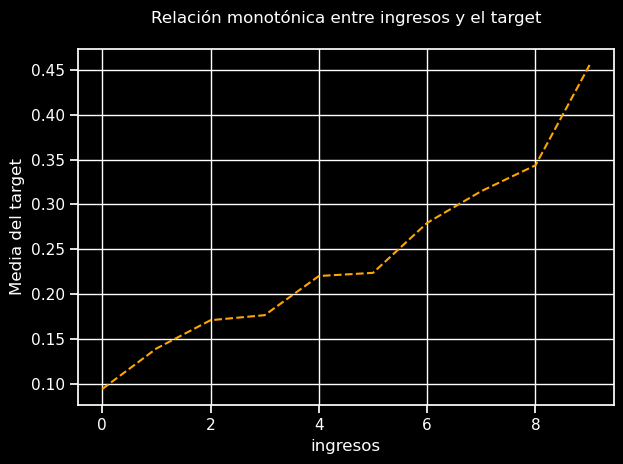

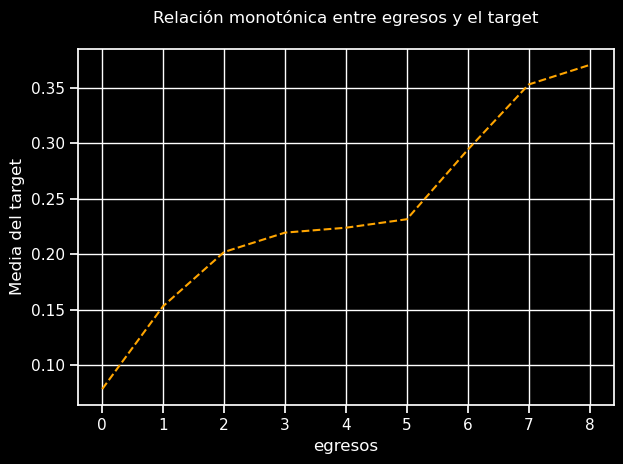

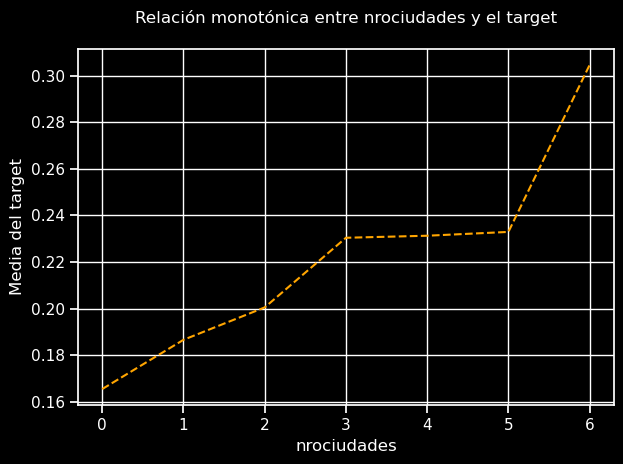

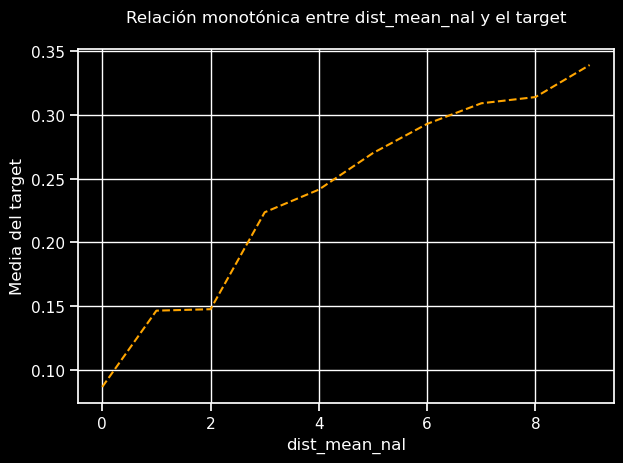

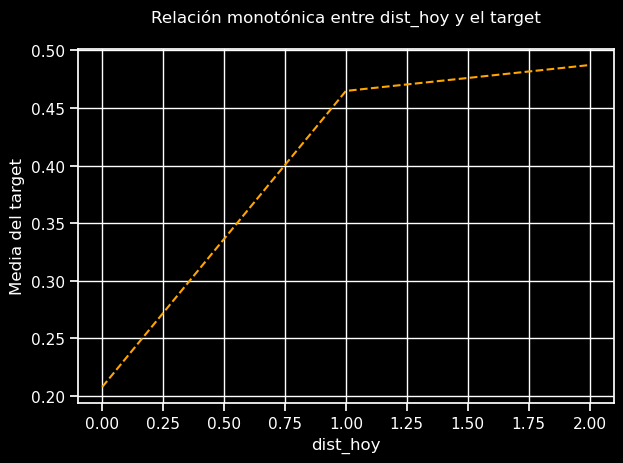

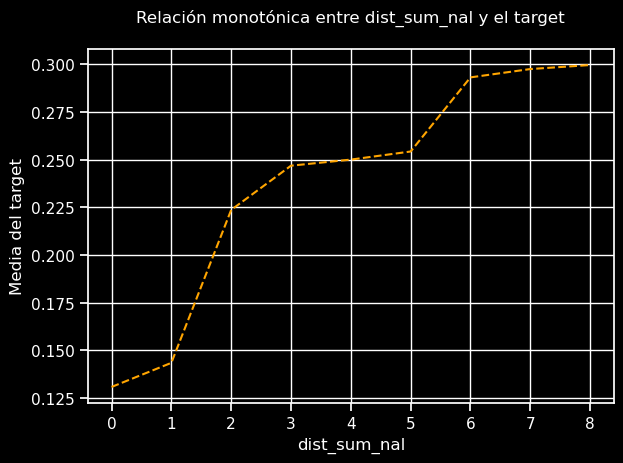

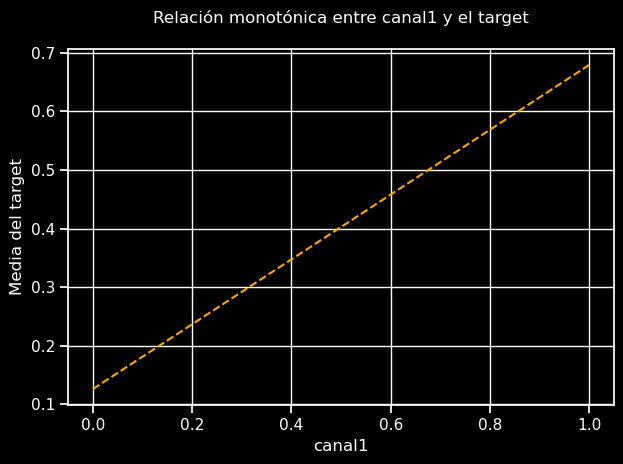

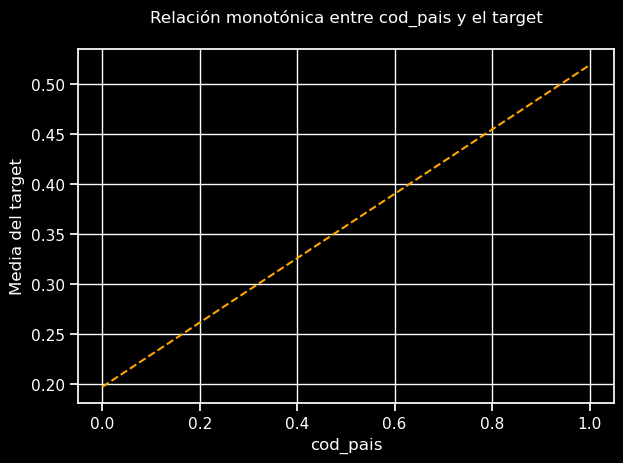

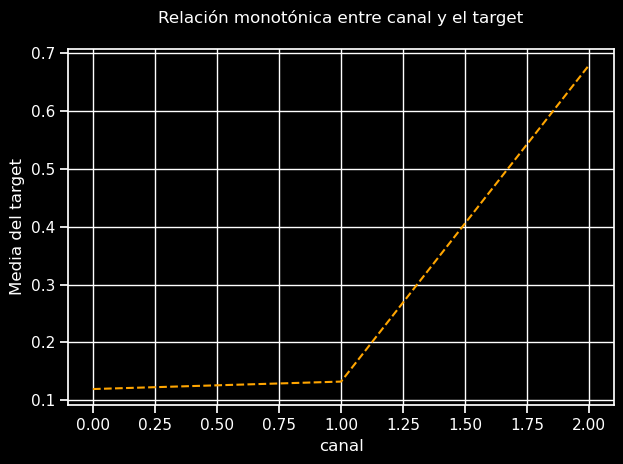

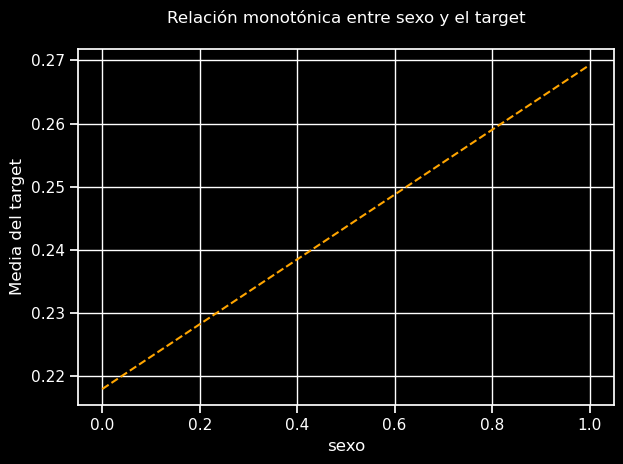

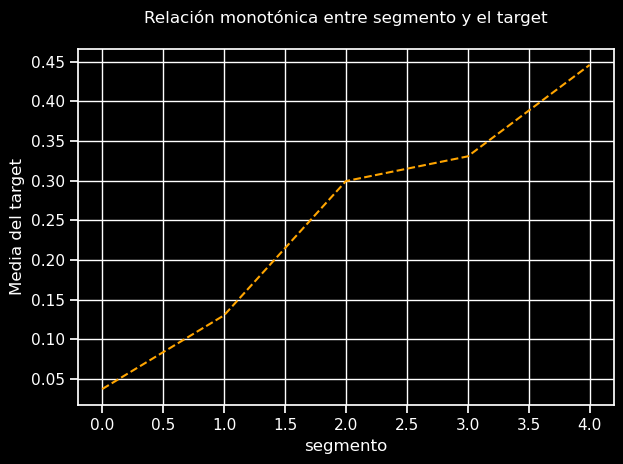

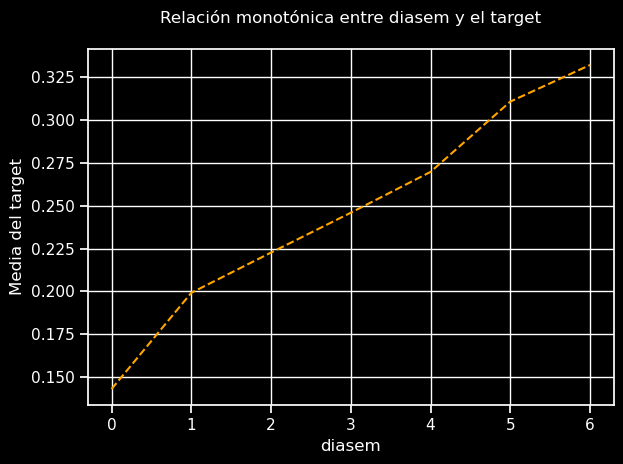

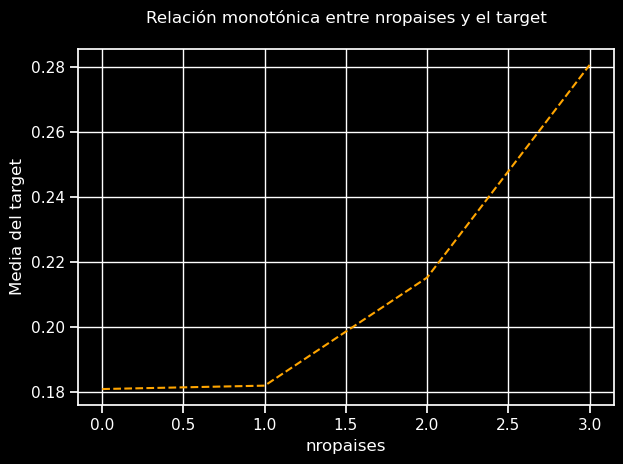

In [41]:
# Inspeccionemos la relación monotónica entre la variable y el target
for var in continuous+categoricals+discretes:
    fig = plt.figure()
    fig = pd.concat([X_train.reset_index(drop=True), 
                     y_train.reset_index(drop=True)], axis=1).groupby([var])['fraude'].mean().plot(color='orange', ls='--')
    fig.set_title(f'Relación monotónica entre {var} y el target\n')
    fig.set_ylabel('Media del target')
    plt.grid()
    plt.tight_layout()

### *Exportar*

In [42]:
import os

try:
    # Obtener la ruta actual del directorio de trabajo
    ruta_actual = os.getcwd()

    # Obtener el directorio padre de la ruta actual
    directorio_padre = os.path.dirname(ruta_actual)

    # Concatenar el nombre de la carpeta "datasets" al directorio padre
    ruta_datasets = os.path.join(directorio_padre, 'datasets')

    # Concatenar el nombre de la carpeta "subsets" a la ruta "ruta_datasets"
    path = os.path.join(ruta_datasets, 'subsets')

    # Crear la carpeta "subsets" en la ruta "path". El argumento exist_ok=True le indica a Python que no genere un error si la carpeta ya existe
    os.makedirs(path, exist_ok=True)

    # Exportar los subsets a la ruta creada
    X_train.to_parquet(f'{path}\X_train.parquet')
    X_val.to_parquet(f'{path}\X_val.parquet')
    
except Exception as e:
        print(type(e).__name__)
        
finally:
    print('¡Realizado exitosamente!')

¡Realizado exitosamente!


---
---